In [21]:
def turun(b,a,x):
    if(x<=a):
        nilai = 1
    elif(x>a and x<b):
        nilai = (b-x)/(b-a)
    elif(x>=b):
        nilai = 0

    return nilai

In [22]:
def naik(b,a,x):
    if(x<=a):
        nilai = 0
    elif(x>a and x<b):
        nilai = (x-a)/(b-a)
    elif(x>=b):
        nilai = 1

    return nilai

In [23]:
def agregasi_turun(b,a,alfa):
    nilai = b - (alfa*(b-a))
    return nilai

In [24]:
def agregasi_turun(b,a,alfa):
    nilai = b - (alfa*(b-a))
    return nilai

In [ ]:
var = int(input("Jumlah variabel: "))

nama_var = []
for i in range(var):
    nama = input("Sebutkan nama variabel: ")
    nama_var.append(nama)

In [ ]:
variabel = dict()
for i in nama_var:
    print(i)
    up = int(input("naik : "))
    down = int(input("turun : "))
    variabel.update({i+"_naik":up})
    variabel.update({i+"_turun":down})
    
print(variabel)

In [ ]:
soal = dict()

jml = int(input("Jumlah variabel yang diketahui : "))

for i in range(jml):
    ver = input("Nama variabel : ")
    val = int(input("Nilai : "))   
    soal.update({ver:val})
    
print(soal)

dit = input("Variabel yang ditanyakan : ")


In [ ]:
nk = dict()
for i in soal:
    up = naik(variabel[i+"_naik"],variabel[i+"_turun"],soal[i])
    down = turun(variabel[i+"_naik"],variabel[i+"_turun"],soal[i])
    nk.update({i+"_naik":up})
    nk.update({i+"_turun":down})

print(nk)

In [ ]:
#AGREGASI
alfa = []
z = []

r = int(input("Masukkan jumlah peraturan : "))

for i in range(r):
    kondisi1 = input("Kondisi 1(naik/turun): ")
    kondisi2 = input("Kondisi 2(naik/turun): ")
    kesimpulan = input("Kesimpulan(naik/turun): ")
    #Fire Strength INTERSEKSI (AND)
    a = min(nk[kondisi1],nk[kondisi2]) 
    alfa.append(a)
    if(kesimpulan == "turun"):
        zz = agregasi_turun(variabel[dit+"_naik"],variabel[dit+"_turun"],a)
    elif(kesimpulan == "naik"):
        zz = agregasi_naik(variabel[dit+"_naik"],variabel[dit+"_turun"],a)        
    z.append(zz)

In [ ]:
print(alfa)
print(z)

In [ ]:
#DEFUZIFIKASI
df = 0

for i in range(len(alfa)):
    df += alfa[i]*z[i]

defuz = int(df/sum(alfa))

print("Jadi, nilai ",dit," adalah ",defuz)

In [ ]:
#https://pypi.python.org/pypi/libarchive
!pip install -U scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [28]:
# Generate universe variables
#   * Quality and service on subjective ranges [0, 1000]
#   * Tip has a range of [0, 7000] in units of percentage points
x_permintaan = np.arange(0, 500, 1000)
x_persediaan = np.arange(0, 600, 100)
x_produksi  = np.arange(0, 7000, 200)

In [30]:
# Generate fuzzy membership functions
permintaan_lo = fuzz.trimf(x_permintaan, [0, 0, 500])
permintaan_md = fuzz.trimf(x_permintaan, [0, 500, 1000])
permintaan_hi = fuzz.trimf(x_permintaan, [500, 1000, 1000])
persediaan_lo = fuzz.trimf(x_persediaan, [0, 0, 100])
persediaan_md = fuzz.trimf(x_persediaan, [0, 100, 600])
persediaan_hi = fuzz.trimf(x_persediaan, [100, 600, 600])
produksi_lo = fuzz.trimf(x_produksi, [0, 0, 200])
produksi_md = fuzz.trimf(x_produksi, [0, 200, 7000])
produksi_hi = fuzz.trimf(x_produksi, [200, 7000, 7000])

In [31]:
# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exists for!
permintaan_level_lo = fuzz.interp_membership(x_permintaan, permintaan_lo, 60.5)
permintaan_level_md = fuzz.interp_membership(x_permintaan, permintaan_md, 60.5)
permintaan_level_hi = fuzz.interp_membership(x_permintaan, permintaan_hi, 60.5)

persediaan_level_lo = fuzz.interp_membership(x_persediaan, persediaan_lo, 90.8)
persediaan_level_md = fuzz.interp_membership(x_persediaan, persediaan_md, 90.8)
persediaan_level_hi = fuzz.interp_membership(x_persediaan, persediaan_hi, 90.8)

In [32]:
# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
active_rule1 = np.fmax(permintaan_level_lo, persediaan_level_lo)

In [33]:
# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
produksi_activation_lo = np.fmin(active_rule1, produksi_lo)  # removed entirely to 0

In [34]:
# For rule 2 we connect acceptable service to medium tipping
produksi_activation_md = np.fmin(persediaan_level_md, produksi_md)

In [35]:
# For rule 3 we connect high service OR high food with high tipping
active_rule3 = np.fmax(permintaan_level_hi, persediaan_level_hi)
produksi_activation_hi = np.fmin(active_rule3, produksi_hi)
produksi0 = np.zeros_like(x_produksi)

In [36]:
# Aggregate all three output membership functions together
aggregated = np.fmax(produksi_activation_lo,
                     np.fmax(produksi_activation_md, produksi_activation_hi))

In [37]:
# Calculate defuzzified result
produksi = fuzz.defuzz(x_produksi, aggregated, 'bisector')
produksi_activation = fuzz.interp_membership(x_produksi, aggregated, produksi)  # for plot

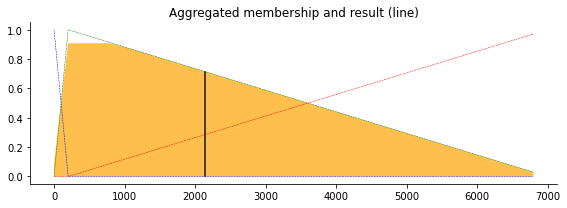

In [38]:
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_produksi, produksi_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_produksi, produksi_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_produksi, produksi_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi, produksi0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([produksi, produksi], [0, produksi_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()